In [1]:
## Packages
'''Import all the necessary packages and modules'''

import numpy as np # package for playing with matrices
from scipy import signal as ss
import matplotlib.pyplot as plt
import sys, os # python modules for interacting with computer
from tkinter import filedialog # interface for opening a file explorer
from tkinter import * # * imports all files in tkinter 
import pandas as pd # useful for keeping cell structure and 2d data manipulation
import glob # helps find path 

In [3]:
## Data Directory GUI Get cable background
'''Getting data directory so data can easily be imported 
using this format data = hs.load('*.dm3', stack=True) to import all dm3s in folder as a stack'''

root1 = Tk() # Tk() is a function in tkinter that opens a window
root1.directory = filedialog.askdirectory() # opens explorer window so you can find the folder of choice
#root.file = fieldialog.askopenfilename()
root1.withdraw() # closes the tkinter window since it's unnecessary
oldcwd1 = os.getcwd() # saves old called working directory (place where data is drawn from) as oldcwd use os.chdir(oldcwd) to go back
os.chdir(root1.directory) # sets new directory
newcwd1 = os.getcwd() # saves new directory name as newcwd
path = root1.directory + '/*.s1p' # creates path to data set folder directory. Change .csv to file type as needed
file_list=glob.glob(path)
file_list

['C:/Users/kbs1/Documents/TEMCarrier Data/TEMCarrierJun2018_S21 data/TEMCarrierJun2018/S21 Measurement/background_cable1\\cable2_open.s1p']

In [4]:
## Load Data use for cables
''' Open data and set up for analysis'''
num_files = np.size(file_list)+1 # number of files in the directory with the correct file type
Header = 4 #Removes string header to work with numpy array
file_shape = np.array(pd.read_csv(glob.glob(path)[0],sep=" ", header=4).values.shape) # data file size
file_shape[0]=file_shape[0] # new file shape after removal of header
file_shape[1]=2
matrix_shape = np.append(file_shape, num_files) # size of matrix to hold all data
data_array_cable = np.empty(matrix_shape) # builds empty matrix of size matrix_shape
a=0 # counter for looping through list starting at 0
for fname in file_list: #iterates through files along order of glob.glob(path)

    data = pd.read_csv(fname, sep=" ", header=Header) # uses pandas to open files and keep structure
    #data=data.drop(data.index[END-Header:END]) #Removes rows of header
    datapd = data.values[:,0:2] # converts from dataframe to numpy array
    
    data_array_cable[:,:,a] = datapd # inserts each file as new layer of matrix along z axis (axis=2)
    a+=1 # increase counter to progress through list

path = root1.directory + '/*.prn' # creates path to data set folder directory. Change .csv to file type as needed
file_list=glob.glob(path)
num_files = np.size(file_list) # number of files in the directory with the correct file type
Header = 4 #Removes string header to work with numpy array
file_shape = np.array(pd.read_csv(glob.glob(path)[0],sep=" ", header=1).values.shape) # data file size
for fname in file_list: #iterates through files along order of glob.glob(path)

    data = pd.read_csv(fname, sep=",", header=1) # uses pandas to open files and keep structure
    #data=data.drop(data.index[END-Header:END]) #Removes rows of header
    datapd = data.values[:,0:2] # converts from dataframe to numpy array
    
    data_array_cable[:,:,a] = datapd # inserts each file as new layer of matrix along z axis (axis=2)
    a+=1 # increase counter to progress through list


In [5]:
## Data Directory GUI Go to S21 folder
'''Getting data directory so data can easily be imported 
using this format data = hs.load('*.dm3', stack=True) to import all dm3s in folder as a stack'''

root2 = Tk() # Tk() is a function in tkinter that opens a window
root2.directory = filedialog.askdirectory() # opens explorer window so you can find the folder of choice
#root.file = fieldialog.askopenfilename()
root2.withdraw() # closes the tkinter window since it's unnecessary
oldcwd2 = os.getcwd() # saves old called working directory (place where data is drawn from) as oldcwd use os.chdir(oldcwd) to go back
os.chdir(root2.directory) # sets new directory
newcwd2 = os.getcwd() # saves new directory name as newcwd

In [8]:
## Load Data use for .s2p data
''' Open data and set up for analysis'''
path = root2.directory + '/*.s2p' # creates path to data set folder directory. Change .csv to file type as needed
a=0 # counter for looping through list starting at 0
file_list=glob.glob(path)
num_files = np.size(file_list) # number of files in the directory with the correct file type
Header = 7 #Removes string header to work with numpy array
file_shape = np.array(pd.read_csv(glob.glob(path)[0],sep=" ", header=Header).values.shape) # data file size
file_shape[0]=file_shape[0] # new file shape after removal of header
matrix_shape = np.append(file_shape, num_files) # size of matrix to hold all data
data_array = np.empty(matrix_shape) # builds empty matrix of size matrix_shape
for fname in file_list: #iterates through files along order of glob.glob(path)

    data = pd.read_csv(fname, sep=" ", header=Header) # uses pandas to open files and keep structure
    #data=data.drop(data.index[END-Header:END]) #Removes rows of header
    datapd = data.values # converts from dataframe to numpy array
    
    data_array[:,:,a] = datapd # inserts each file as new layer of matrix along z axis (axis=2)
    a+=1 # increase counter to progress through list

data_array_1=np.delete(data_array, np.s_[2::2],1)
data_array_2=np.delete(data_array_1, np.s_[1::3],1)
data_array=data_array_2
file_list

['C:/Users/kbs1/Documents/TEMCarrier Data/TEMCarrierJun2018_S21 data/TEMCarrierJun2018/S21 Measurement/Chip data\\DC_S21_Ports25.s2p',
 'C:/Users/kbs1/Documents/TEMCarrier Data/TEMCarrierJun2018_S21 data/TEMCarrierJun2018/S21 Measurement/Chip data\\DC_S21_Ports34.s2p',
 'C:/Users/kbs1/Documents/TEMCarrier Data/TEMCarrierJun2018_S21 data/TEMCarrierJun2018/S21 Measurement/Chip data\\DC_S21_Ports54.s2p',
 'C:/Users/kbs1/Documents/TEMCarrier Data/TEMCarrierJun2018_S21 data/TEMCarrierJun2018/S21 Measurement/Chip data\\DC_S21_Ports63.s2p',
 'C:/Users/kbs1/Documents/TEMCarrier Data/TEMCarrierJun2018_S21 data/TEMCarrierJun2018/S21 Measurement/Chip data\\NoChip_Ports16.s2p',
 'C:/Users/kbs1/Documents/TEMCarrier Data/TEMCarrierJun2018_S21 data/TEMCarrierJun2018/S21 Measurement/Chip data\\NoChip_Ports25.s2p',
 'C:/Users/kbs1/Documents/TEMCarrier Data/TEMCarrierJun2018_S21 data/TEMCarrierJun2018/S21 Measurement/Chip data\\NoChip_Ports27.s2p',
 'C:/Users/kbs1/Documents/TEMCarrier Data/TEMCarrierJun

In [205]:
## Functions
''' Run cell to use functions'''
def normalize(raw):
    norm=[]
    for i in raw:
        if i<0:
            norm.append(-i/min(raw))
        elif i>0:
            norm.append(i/max(raw))
        else:
            norm.append(i)
    return norm
def lowpass_filter(YA,sample_range,filter_size): #YA data set, measured sample range, filter_size arbitrary frequency cutoff based on number of samples
                   
    r=YA.shape[0]                   
    s=sample_range #GHz
    z=np.fft.fftfreq(r)/(2*s)*r
    B=filter_size
    e=int((B)/z[1])
    t=np.linspace(0, s, r)

    fYA=np.fft.rfft(YA)
    filter_e=e
    fYAr=np.zeros(fYA.shape[0])
    fYAl=np.zeros(fYA.shape[0])
    fYAr[:filter_e]=np.real(fYA[:filter_e])
    fYAl[:filter_e]=np.imag(fYA[:filter_e])
    fYA_filt=np.array(fYAr)+np.array(1j*fYAl)
    ifY=np.fft.irfft(fYA_filt)
    return ifY

def list_around(X,rang): # X is a number rang is the range around e.g X=8 rang=2 => list [6,7,8,9,10]
    lis=list(range(int(X)-int(rang),int(X)+int(rang)))
    
    return lis

def log10mean(X, axis):
    L=10* np.log10(np.mean((10**(X/10)),axis=axis))
    return L
def log10perdiff(X,Y):
    P = 100*((10**(X/10)-10**(Y/10))/((10**(X/10)+10**(Y/10))/2))
    return P
def log10perdiff1(X,Y):
    P = 10*np.log10(10**((X-Y)/10))
    return P
def log10div(X,Y):
    if X>=0:
        D = 10*np.log10(10**(X/10)/Y)
    else:
        D=10*np.log10((1-10**(X/10))/Y)
    return D
def log10add(X,Y):
    A = 10*np.log10(10**(X/10)+10**(Y/10))
    return A
def todB(X):
    d=10*np.log10(X)
    return d
def dBtonum(X):
    N = 10**(X/10)
    return N

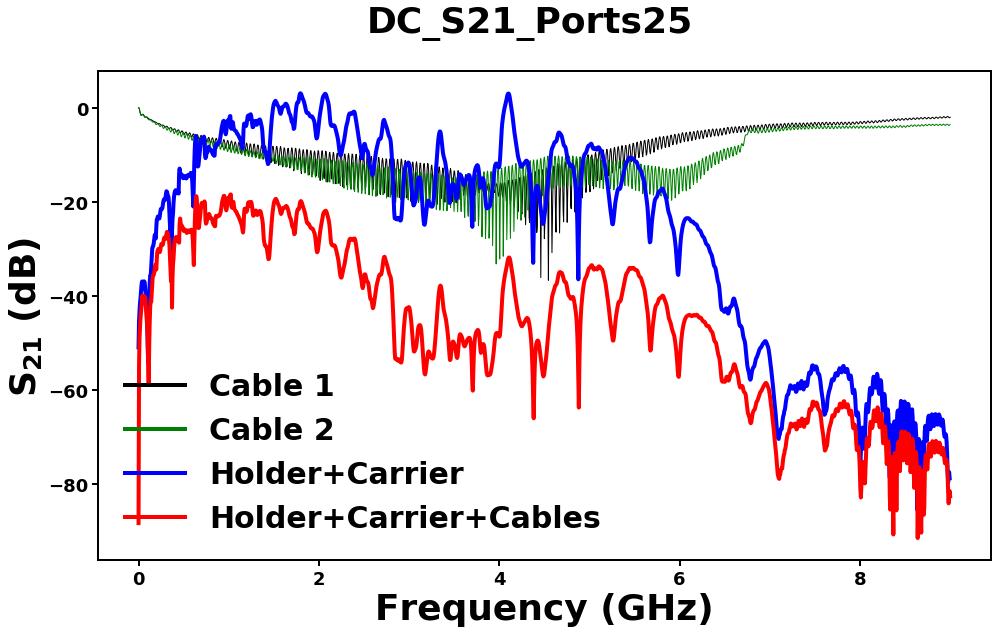

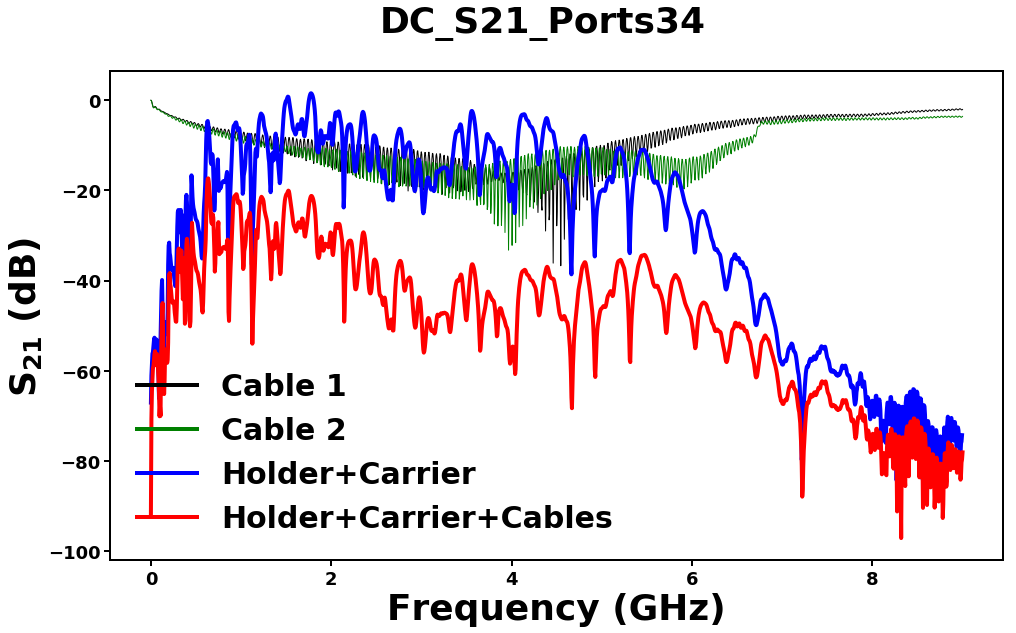

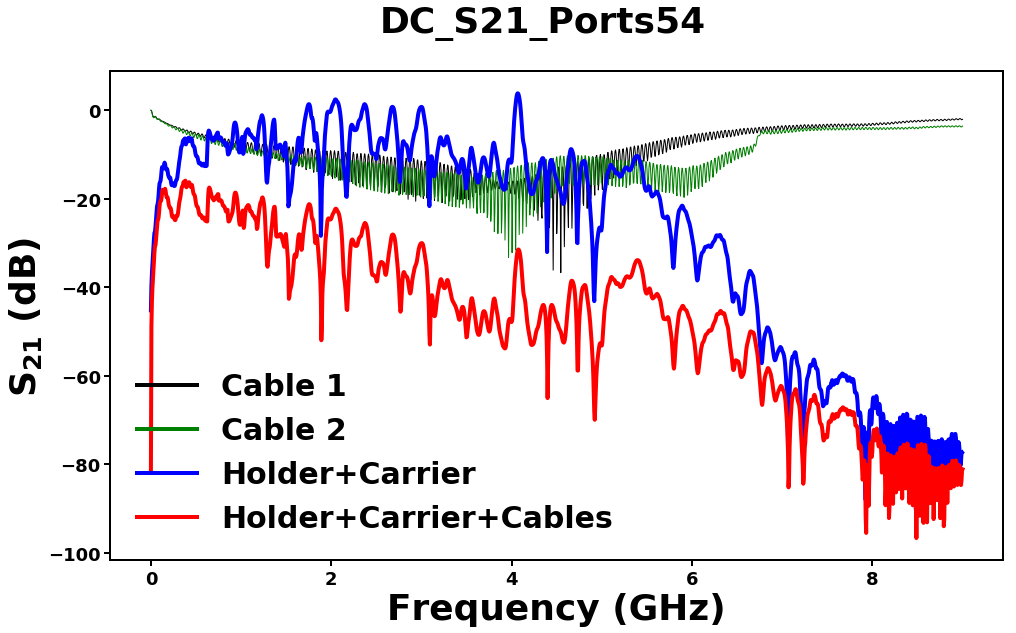

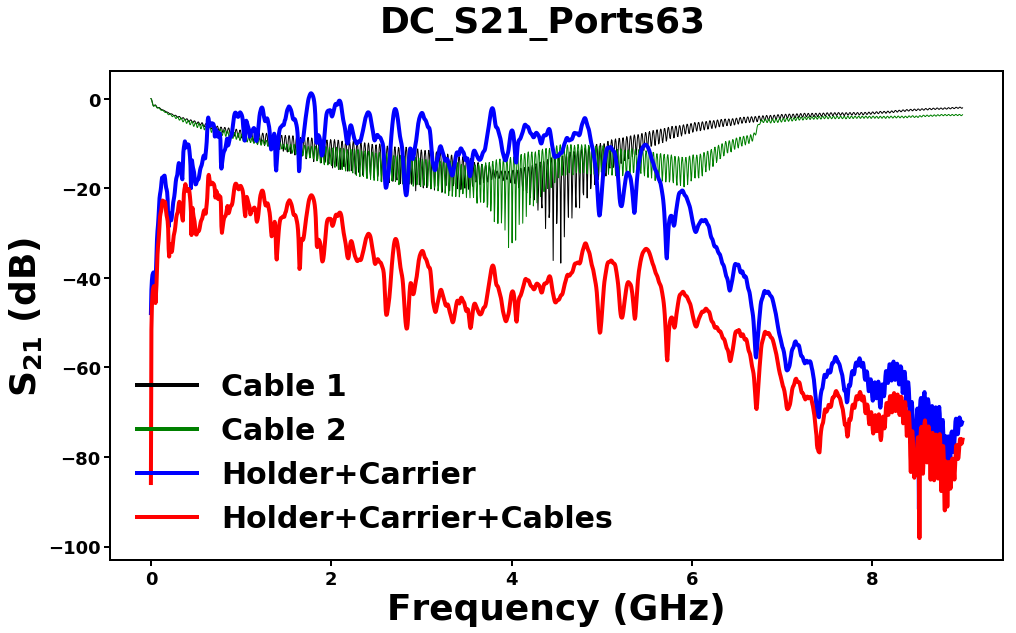

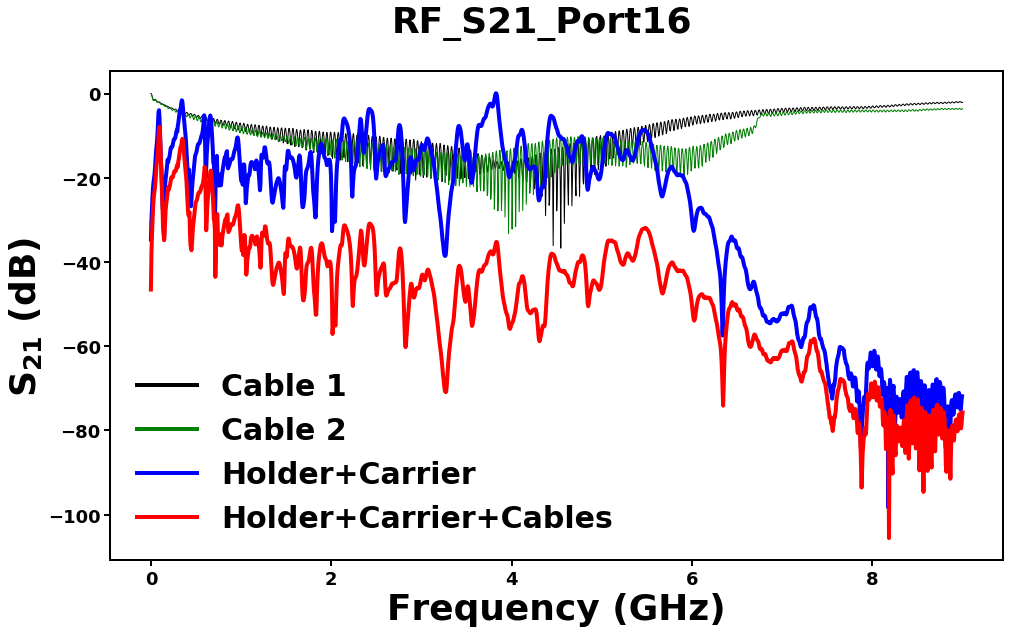

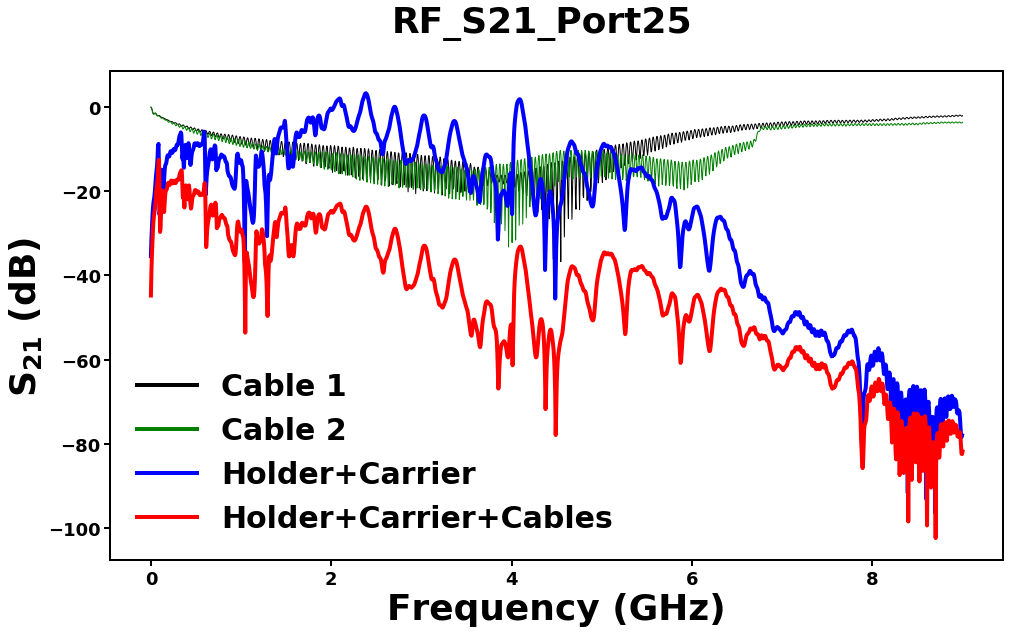

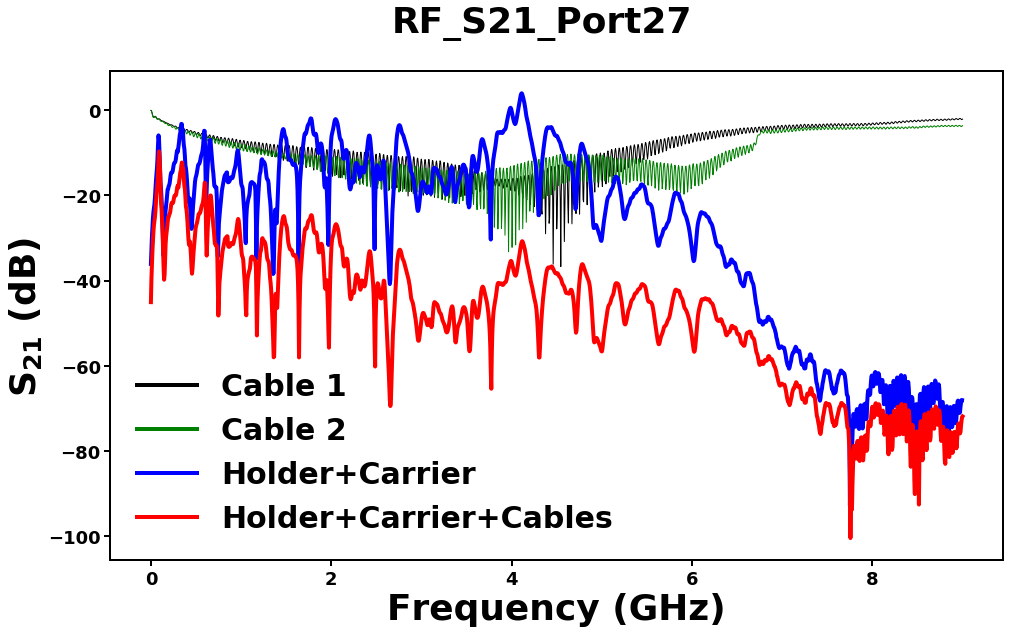

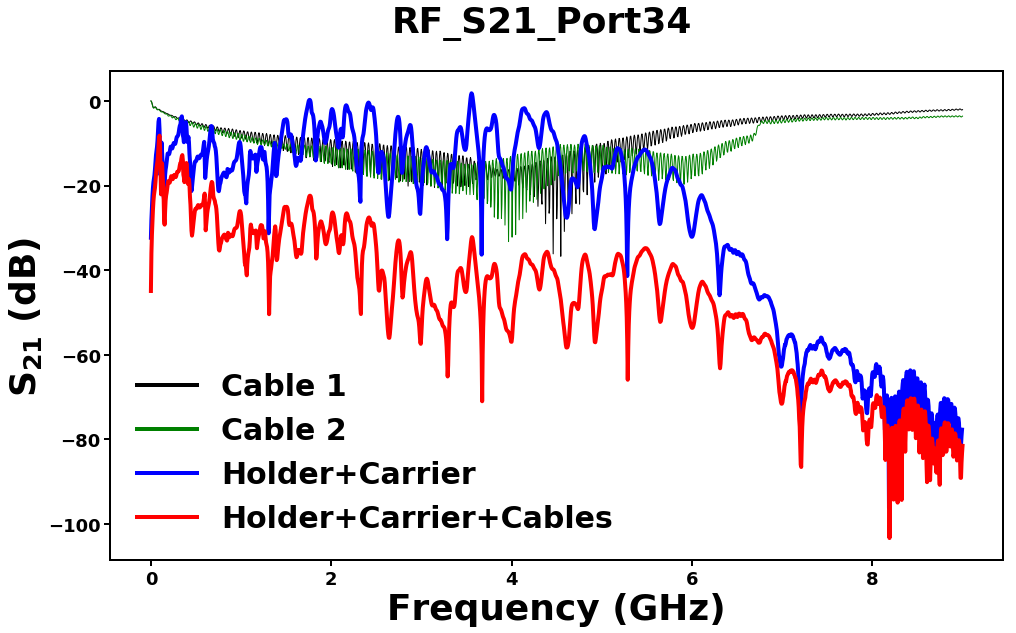

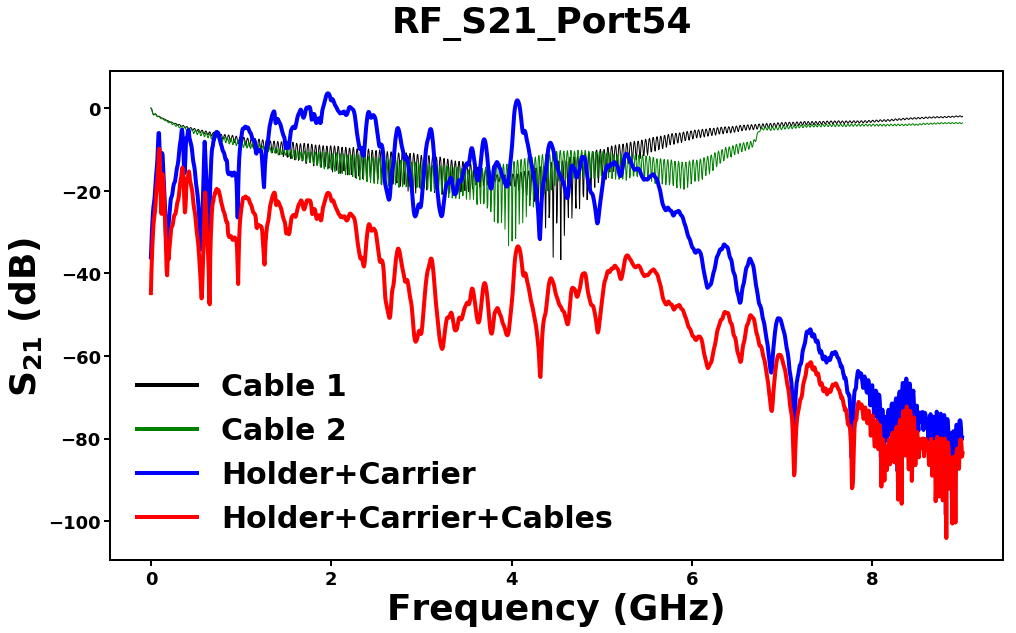

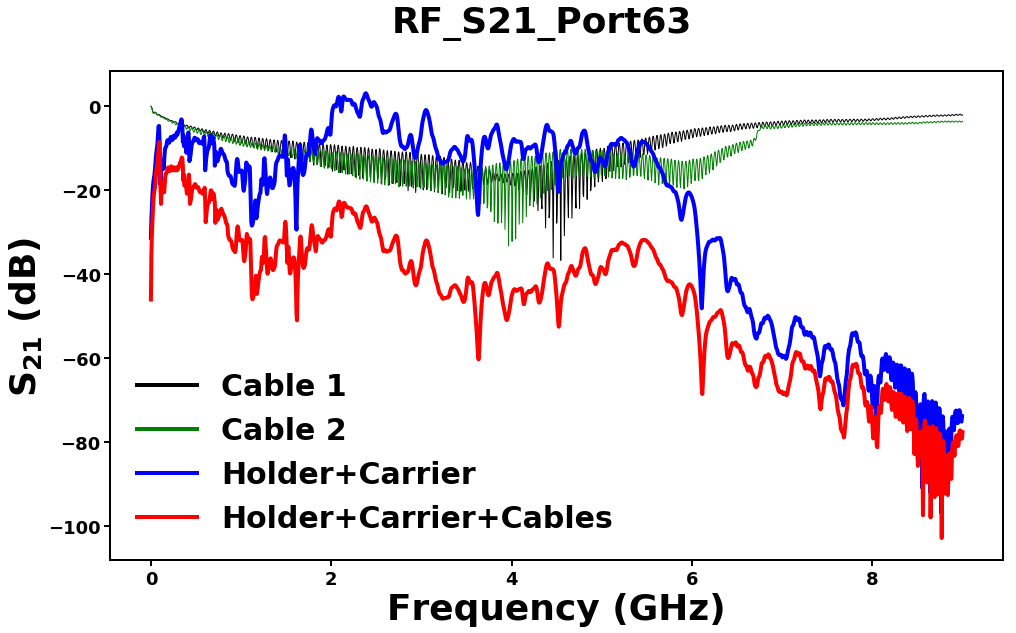

In [10]:
## RF data plotting
''' Opens all RF samples and subtracts cable results. Also plots filtered data'''

plot_file=np.concatenate((np.arange(0,4),(np.arange(10,16))))
bg_list=np.array([5, 7, 9, 8, 4, 5, 6, 7, 9, 8])
#data_array_order=[2,4,6,8,10,12,14] #Used for plotting A experiments
#data_array_order=[3,5,7,9,11,13,15] #Used for plotting B experiments
a=0
for n in plot_file:
  
    #X=data_A_2[:,0,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    #Y=data_A_2[:,1,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    x_cable=data_array[:,0,0]
    y_cable=data_array_cable[:,1,0]
    x_cable1=data_array[:,0,1]
    y_cable1=data_array_cable[:,1,1]
    y_cable_filt=lowpass_filter(y_cable,9,3)
    y_cable1_filt=lowpass_filter(y_cable1,9,3)
    
    x_orig=data_array[:,0,n]/1e9
    y_orig=data_array[:,1,n]
    y_carrier=(y_orig-data_array[:,1,bg_list[a]])
    y_bg=data_array[:,1,bg_list[a]]
    #x_filt=data_array[:,0,n] #Used for plotting B experiments as data_B_R, R=1,2
    y_orig_filt=lowpass_filter(y_orig,9,3) #Used for plotting B experiments as data_B_R, R=1,2
    
    Y_holder=y_orig[1:]-y_cable_filt-y_cable1_filt
    Y_holder_filt= y_orig_filt-y_cable_filt
    
    Data_Name = os.path.basename(file_list[n]).split('.')[0] #Change name whether R=1,2 and With to Without if A or B

    plt.rc('font', weight='bold')
    plt.rcParams['axes.linewidth']=2
    plt.rcParams['figure.figsize'] = (16,9)

    fig = plt.figure()
    fig.suptitle(Data_Name, fontsize=36, fontweight='bold')

    ax = fig.add_subplot(111)

    ax.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
    ax.set_ylabel(r'S$_{21}$ (dB)', fontsize=36, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
    ax.xaxis.get_offset_text().set_visible(False)

    #fig=plt.plot(X,Y,'k-',label='Chip')
    font_size=4
    #fig=plt.plot(x_orig,y_carrier,'k-',linewidth=font_size, label='Carrier')
    fig=plt.plot(x_orig,y_cable,'k-',linewidth=1, label='Cable 1')
    fig=plt.plot(x_orig,y_cable1,'g-',linewidth=1, label='Cable 2')
    fig=plt.plot(x_orig[:-1],Y_holder,'b-',linewidth=font_size, label='Holder+Carrier')
    fig=plt.plot(x_orig,y_orig,'r-',linewidth=font_size, label='Holder+Carrier+Cables')
    
    #fig=plt.plot(x_orig,y_bg,'k-',linewidth=3)
    #fig=plt.plot(x_cable[:-1],y_cable_filt,'g-',linewidth=5)
    #fig=plt.plot(x_orig[:-1],y_orig_filt,'r-',linewidth=5)    

    leg=plt.legend(fontsize=30, loc=3, frameon=False)

    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    plt.show()
    a+=1
    #save_loc=root2.directory+ '/' + 'Python_Results'+ '/' +Data_Name+'.png'
    #plt.savefig(save_loc)

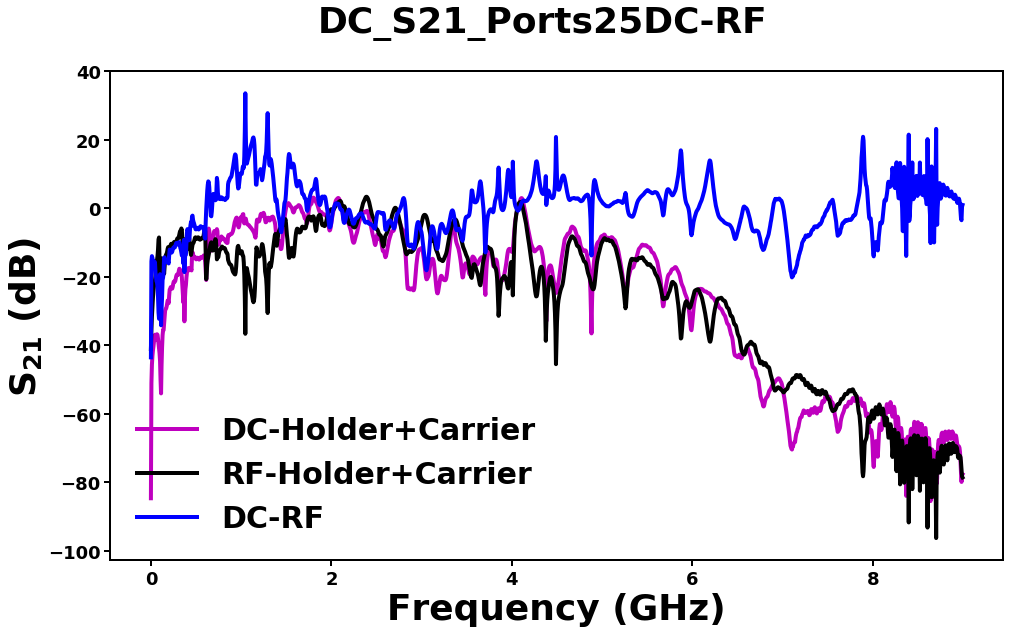

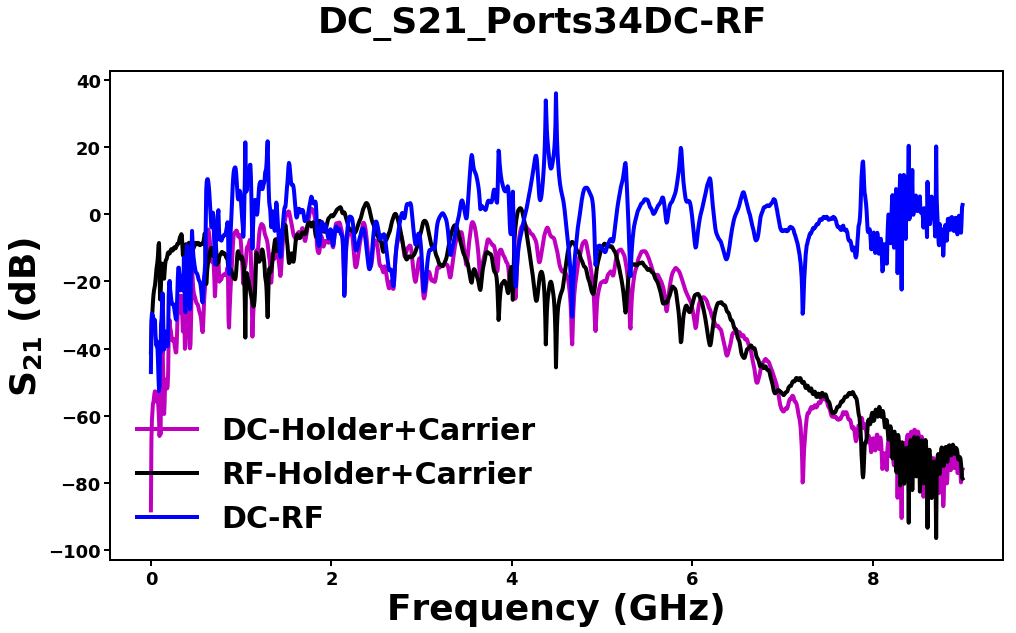

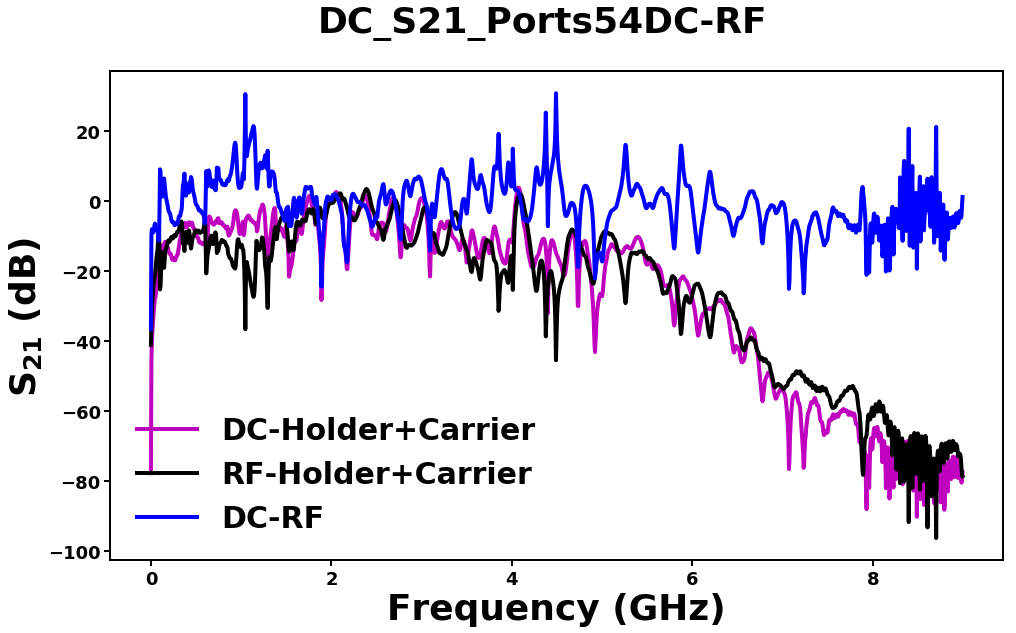

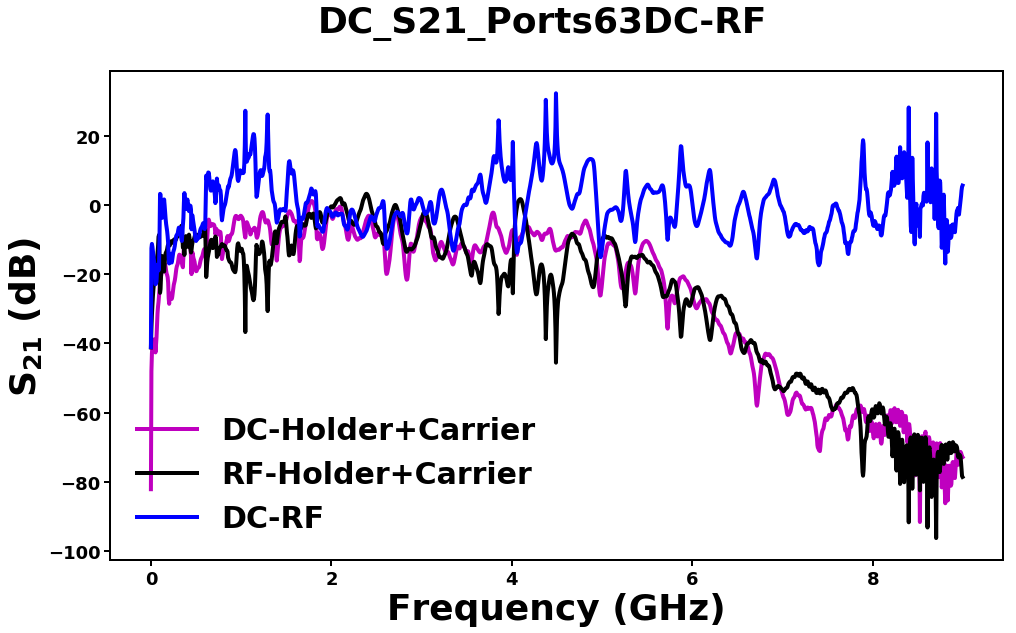

In [11]:
## RF data plotting DC-RF
''' Opens all RF samples and subtracts cable results. Also plots filtered data'''

plot_file=np.arange(0,4)
bg_list=np.array([11,13,14,15])
#data_array_order=[2,4,6,8,10,12,14] #Used for plotting A experiments
#data_array_order=[3,5,7,9,11,13,15] #Used for plotting B experiments

sum_data=np.zeros((data_array.shape[0]-1,4))
arrayx=np.zeros([data_array.shape[0]-1,4])
arraydcy=np.zeros([data_array.shape[0]-1,4])

arrayrfy=np.zeros([data_array.shape[0]-1,4])


a=0
for n in plot_file:
  
    #X=data_A_2[:,0,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    #Y=data_A_2[:,1,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    x_cable=data_array[:,0,0]/1e9
    y_cable=data_array_cable[:,1,0]
    x_cable1=data_array[:,0,1]/1e9
    y_cable1=data_array_cable[:,1,1]
    y_cable_filt=lowpass_filter(y_cable,9,3)
    y_cable1_filt=lowpass_filter(y_cable1,9,3)
    
    dcx_orig=data_array[:-1,0,n]/1e9
    dcy_orig=data_array[:-1,1,n]-y_cable_filt-y_cable1_filt
    
    rfy_orig=data_array[:-1,1,bg_list[a]]-y_cable_filt-y_cable1_filt
    y_DCRF=dcy_orig-rfy_orig
    #x_filt=data_array[:,0,n] #Used for plotting B experiments as data_B_R, R=1,2
    
    arrayx[:,n]=dcx_orig;
    arraydcy[:,n]=dcy_orig
    arrayrfy[:,n]=rfy_orig
    

    sum_data[:,a]=y_DCRF
    Data_Name = os.path.basename(file_list[n]).split('.')[0] +'DC-RF' #Change name whether R=1,2 and With to Without if A or B

    plt.rc('font', weight='bold')
    plt.rcParams['axes.linewidth']=2
    plt.rcParams['figure.figsize'] = (16,9)

    fig = plt.figure()
    fig.suptitle(Data_Name, fontsize=36, fontweight='bold')

    ax = fig.add_subplot(111)

    ax.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
    ax.set_ylabel(r'S$_{21}$ (dB)', fontsize=36, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
    ax.xaxis.get_offset_text().set_visible(False)

    #fig=plt.plot(X,Y,'k-',label='Chip')
    font_size=4
    #fig=plt.plot(x_orig,y_carrier,'k-',linewidth=font_size, label='Carrier')
    fig=plt.plot(dcx_orig,dcy_orig,'m-',linewidth=font_size, label='DC-Holder+Carrier')
    fig=plt.plot(x_orig[:-1],rfy_orig,'k-',linewidth=font_size, label='RF-Holder+Carrier')
    fig=plt.plot(x_orig[:-1],y_DCRF,'b-',linewidth=font_size, label='DC-RF')
    
    #fig=plt.plot(x_orig,y_orig,'r-',linewidth=font_size, label='Holder+Carrier+Cables')
    
    #fig=plt.plot(x_orig,y_bg,'k-',linewidth=3)
    #fig=plt.plot(x_cable[:-1],y_cable_filt,'g-',linewidth=5)
    #fig=plt.plot(x_orig[:-1],y_orig_filt,'r-',linewidth=5)    

    leg=plt.legend(fontsize=30, loc=3, frameon=False)

    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    plt.show()
#     a+=1
#     save_loc=root2.directory+ '/' + 'Python_Results'+ '/DC-RF''/' +Data_Name+'.png'
#     plt.savefig(save_loc)

In [30]:
filtnum=1.5
mean_dcy=log10mean(arraydcy[:,1:2], axis=1)
mean_rfy=log10mean(arrayrfy[:,1:2], axis=1)

addedge_dc=int(mean_dcy.shape[0]/filtnum)
addedge_rf=int(mean_rfy.shape[0]/filtnum)

edgehelp_dc=np.zeros(addedge_dc*2+mean_dcy.shape[0])
edgehelp_rf=np.zeros(addedge_rf*2+mean_rfy.shape[0])

edgehelp_dc[addedge_dc:-addedge_dc]=mean_dcy
edgehelp_rf[addedge_rf:-addedge_rf]=mean_rfy

edgehelp_dc[0:addedge_dc]=mean_dcy[0]
edgehelp_dc[-addedge_dc:]=mean_dcy[-1]

edgehelp_rf[0:addedge_dc]=mean_rfy[0]
edgehelp_rf[-addedge_dc:]=mean_rfy[-1]


In [46]:
perdiff.shape

(1600,)

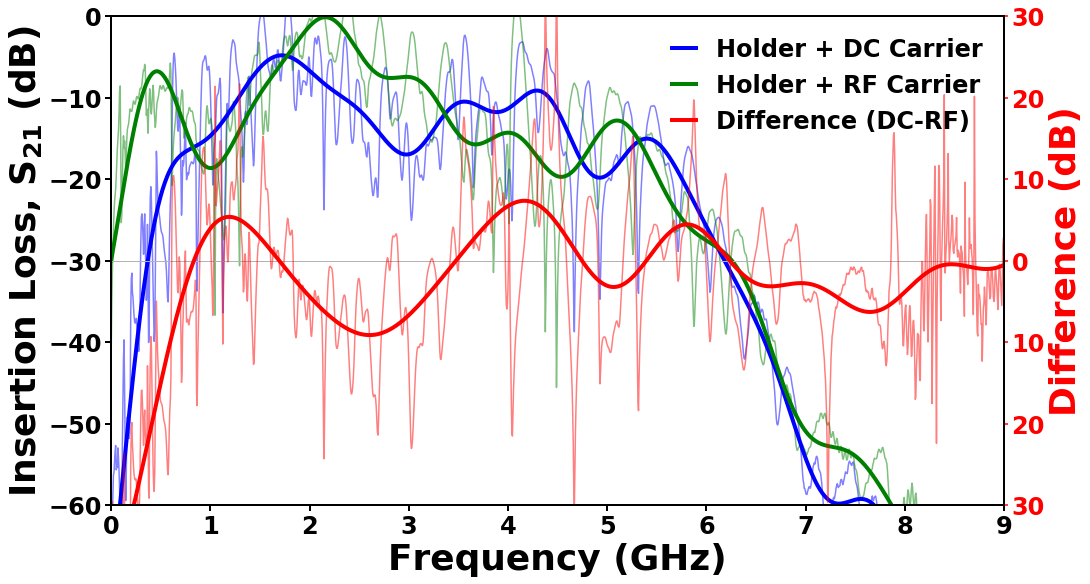

In [100]:
## Plot Mean RF and Mean DC

mean_x=np.mean(arrayx,axis=1)
# mean_dcy=lowpass_filter(log10mean(arraydcy[:,1:2], axis=1),5,3)
# mean_rfy=lowpass_filter(log10mean(arrayrfy[:,1:2], axis=1),5,3)
filtnum=1.5
mean_dcy=log10mean(arraydcy[:,1:2], axis=1)
mean_rfy=log10mean(arrayrfy[:,1:2], axis=1)

addedge_dc=int(mean_dcy.shape[0]/filtnum)
addedge_rf=int(mean_rfy.shape[0]/filtnum)

edgehelp_dc=np.zeros(addedge_dc*2+mean_dcy.shape[0])
edgehelp_rf=np.zeros(addedge_rf*2+mean_rfy.shape[0])

edgehelp_dc[addedge_dc:-addedge_dc]=mean_dcy
edgehelp_rf[addedge_rf:-addedge_rf]=mean_rfy

edgehelp_dc[0:addedge_dc]=mean_dcy[0]
edgehelp_dc[-addedge_dc:]=mean_dcy[-1]

edgehelp_rf[0:addedge_dc]=mean_rfy[0]
edgehelp_rf[-addedge_dc:]=mean_rfy[-1]

mean_dcy_filt=lowpass_filter(edgehelp_dc,9,filtnum)
mean_rfy_filt=lowpass_filter(edgehelp_rf,9,filtnum)


diff=mean_dcy-mean_rfy
perdiff=log10perdiff1(mean_dcy,mean_rfy)
perdiff_edge=log10perdiff1(edgehelp_dc,edgehelp_rf)
# perdiff_filt=log10perdiff(mean_dcy_filt,mean_rfy_filt)

filt_perdiff=lowpass_filter(perdiff_edge,9,1)

plt.rc('font', weight='bold')
plt.rcParams['axes.linewidth']=2
plt.rcParams['figure.figsize'] = (16,9)

fig = plt.figure()
# fig.suptitle(Data_Name, fontsize=36, fontweight='bold')

ax = fig.add_subplot(111)
plt.xlim(0,9)
# plt.ylim(-30,0)
plt.ylim(-60,0)
ax1 = ax.twinx()
ax.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
ax.set_ylabel(r'Insertion Loss, S$_{21}$ (dB)', fontsize=36, fontweight='bold')
ax1.set_ylabel('Difference (dB)', fontsize=36, fontweight='bold')
ax1.set(ylim=(-30,30))

loc1y=np.arange(-30,31,10)
ax1.yaxis.set_ticks(loc1y)
label1y=[30,20,10,0,10,20,30]
ax1.yaxis.set_ticklabels(label1y)


ax.tick_params(axis='both', which='major', labelsize=24, width=2, length=6)
ax.tick_params(axis='both', which='minor', labelsize=24, width=2, length=6)
ax1.tick_params(axis='both', which='major', labelsize=24, width=2, length=6)
# ax.xaxis.get_offset_text().set_visible(False)
tkw = dict(size=4, width=1.5)
ax1.tick_params(axis='y', colors='r', **tkw)
font_size=1.5
font_size1=4
#fig=plt.plot(x_orig,y_carrier,'k-',linewidth=font_size, label='Carrier')
spot=6.75
vertlinex=[spot,spot]
vertliney=[-100,5]

horlinex=np.arange(0,1601,1)
horliney=np.zeros(1601)


alph=.5
ax1.plot(horlinex,horliney, '.7', linewidth=1)
lns3=ax1.plot(mean_x,perdiff,'r-',linewidth=font_size,alpha=alph)
# lns6=ax.plot(mean_x,perdiff_filt,'k-',linewidth=font_size, label='DC-RF')
lns7=ax1.plot(mean_x,filt_perdiff[addedge_dc:-addedge_dc],'r-',linewidth=font_size1, label='Difference (DC-RF)')

leg=ax1.legend(fontsize=30, loc='best', frameon=False)
# ax1.ylim(-100,20)
for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)


lns1=ax.plot(mean_x,mean_dcy,'b-',linewidth=font_size,alpha=alph)
lns2=ax.plot(mean_x,mean_rfy,'g-',linewidth=font_size,alpha=alph)

lns4=ax.plot(mean_x,mean_dcy_filt[addedge_dc:-addedge_dc],'b-',linewidth=font_size1, label='Holder + DC Carrier')
lns5=ax.plot(mean_x,mean_rfy_filt[addedge_rf:-addedge_rf],'g-',linewidth=font_size1, label='Holder + RF Carrier')
# lns5=ax.plot(mean_x,log10div(mean_rfy_filt,2),'p-',linewidth=font_size1, label='RF')
# plt.plot(mean_x,diff,'k-',linewidth=font_size, label='DC-RF')

lns = lns4+lns5+lns7
labs = [l.get_label() for l in lns]
leg=ax1.legend(lns, labs, loc='best',fontsize=24, frameon=False, handlelength=1)

# leg=ax.legend(fontsize=30, loc='best', frameon=False)

for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)
    
ax.yaxis.label.set_color('k')
ax1.yaxis.label.set_color('r')

In [670]:
mean_perdiff=np.mean(perdiff[89:1067])
min_perdiff=np.min(perdiff)
max_perdiff=np.max(perdiff)

print(mean_perdiff,min_perdiff,max_perdiff)

-0.5217953292433538 -52.56432500000001 35.960282


In [50]:
root2 = Tk(); # Tk() is a function in tkinter that opens a window
root2.directory = filedialog.askdirectory(); # opens explorer window so you can find the folder of choice
root2.withdraw(); # closes the tkinter window since it's unnecessary

In [51]:
file_name2='S21 results6'
ext2='.png'
file_loc2=root2.directory+'/'+file_name2+ext2
file_loc2

'Z:/Carrier Paper/Figure 3/S21 results6.png'

In [53]:
fig.savefig(file_loc2,dpi=600,bbox_inches='tight')

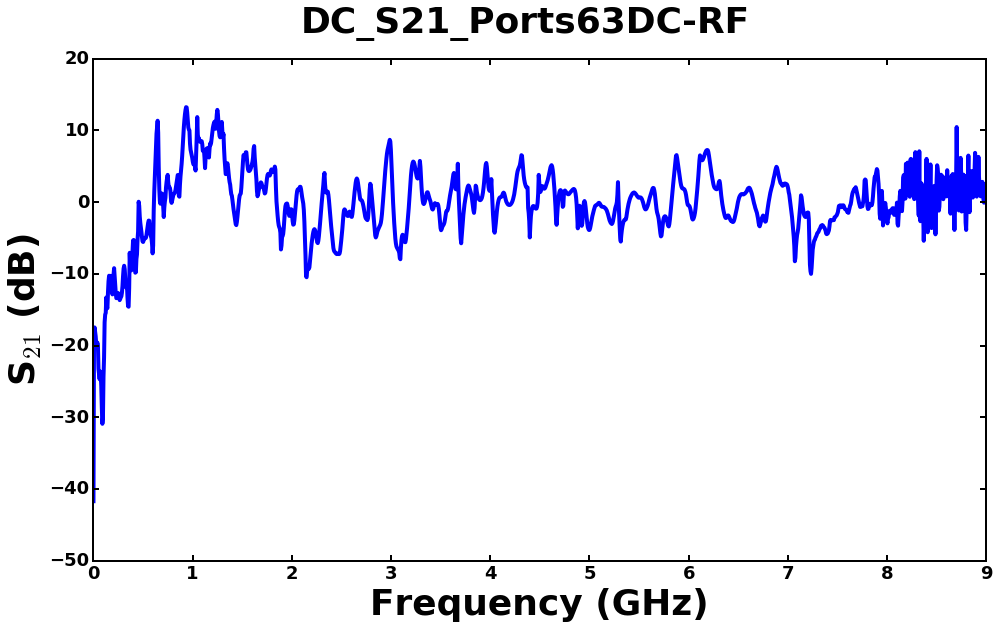

In [31]:
sum_DCRF=np.zeros(sum_data.shape[0])
for n in np.arange(0,4):
    sum_DCRF+=sum_data[:,n]
sum_DCRF=sum_DCRF/4
plt.rc('font', weight='bold')
plt.rcParams['axes.linewidth']=2
plt.rcParams['figure.figsize'] = (16,9)

fig = plt.figure()
fig.suptitle(Data_Name, fontsize=36, fontweight='bold')

ax = fig.add_subplot(111)

ax.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
ax.set_ylabel(r'S$_{21}$ (dB)', fontsize=36, fontweight='bold')

ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
ax.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
ax.xaxis.get_offset_text().set_visible(False)

font_size=4
#fig=plt.plot(x_orig,y_carrier,'k-',linewidth=font_size, label='Carrier')
fig=plt.plot(x_orig[:-1],sum_DCRF,'b-',linewidth=font_size, label='Carrier')

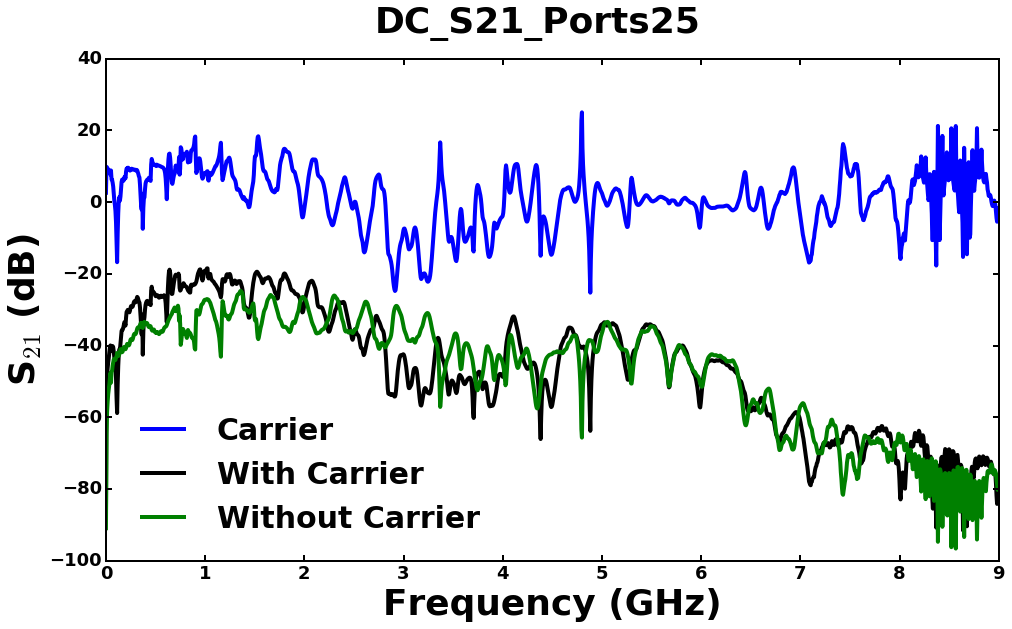

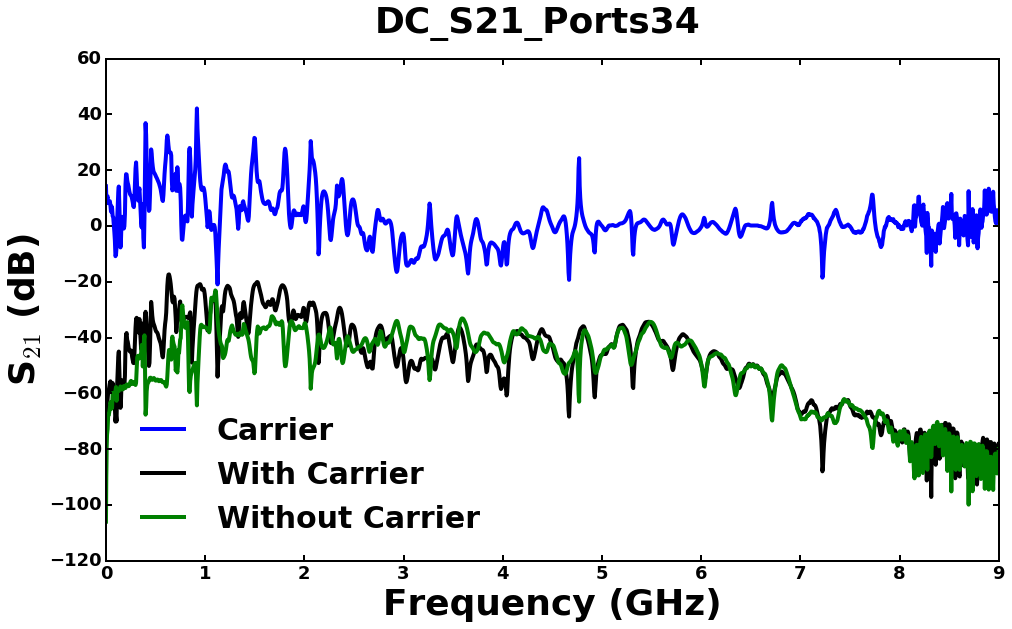

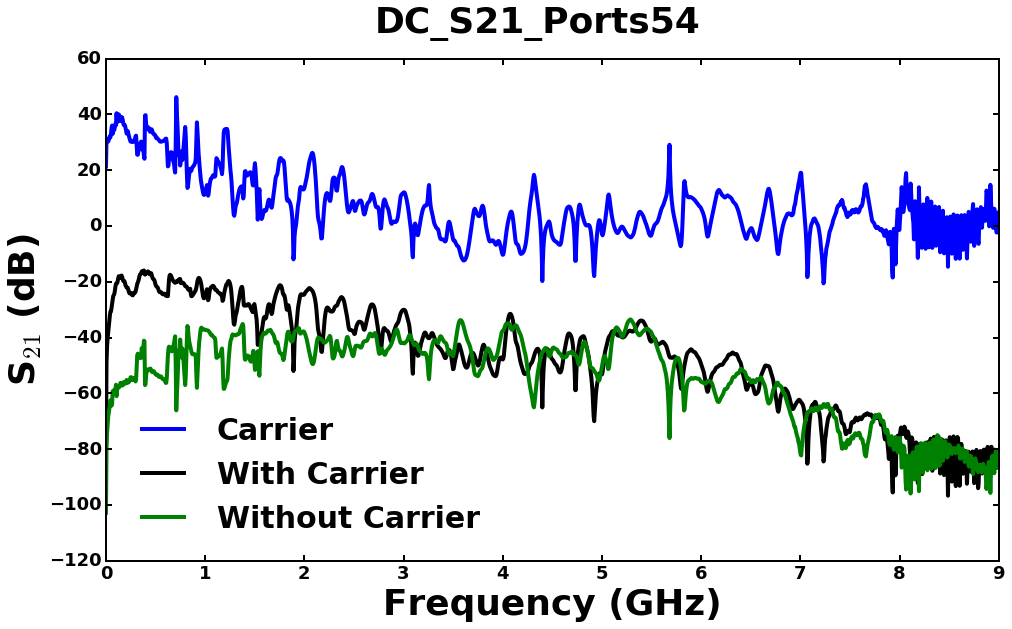

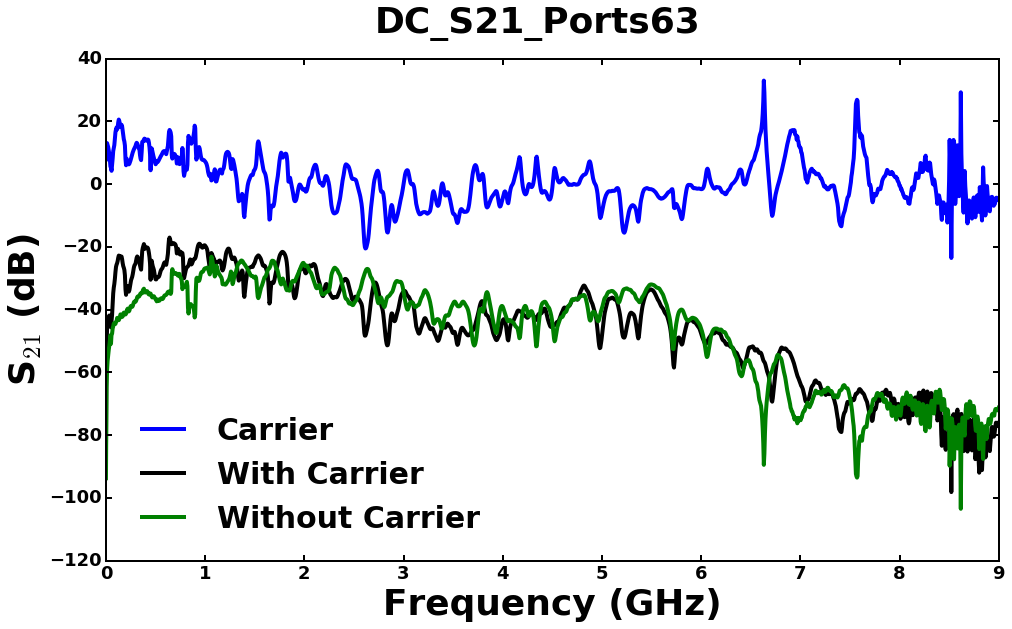

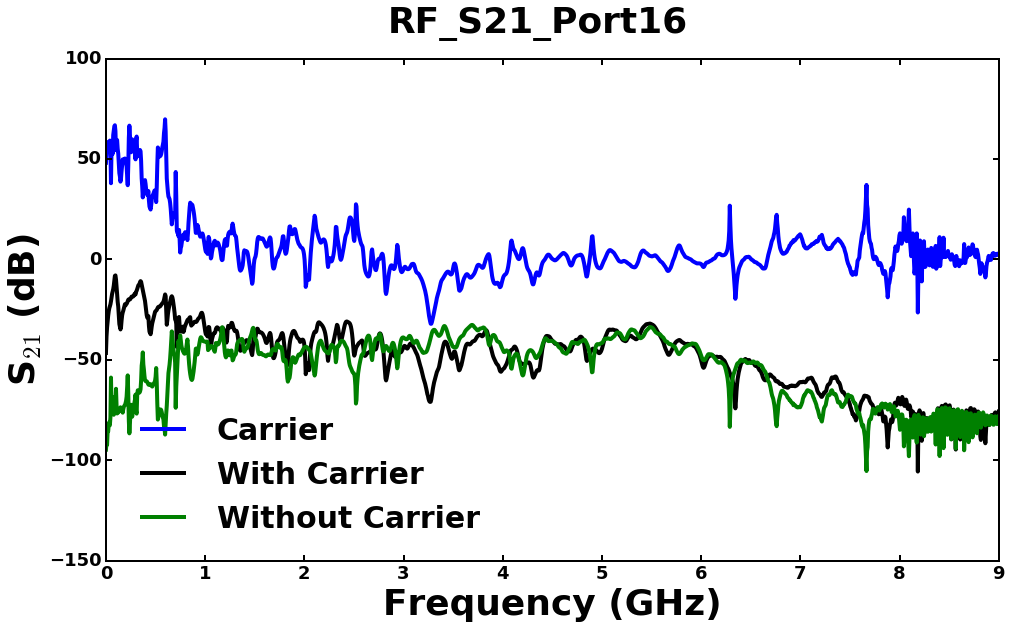

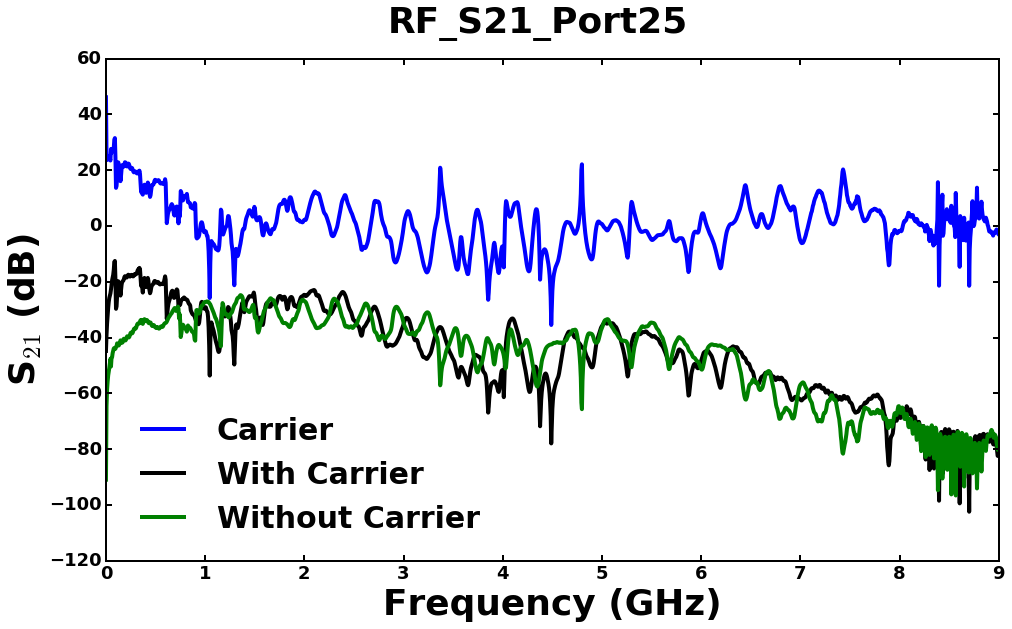

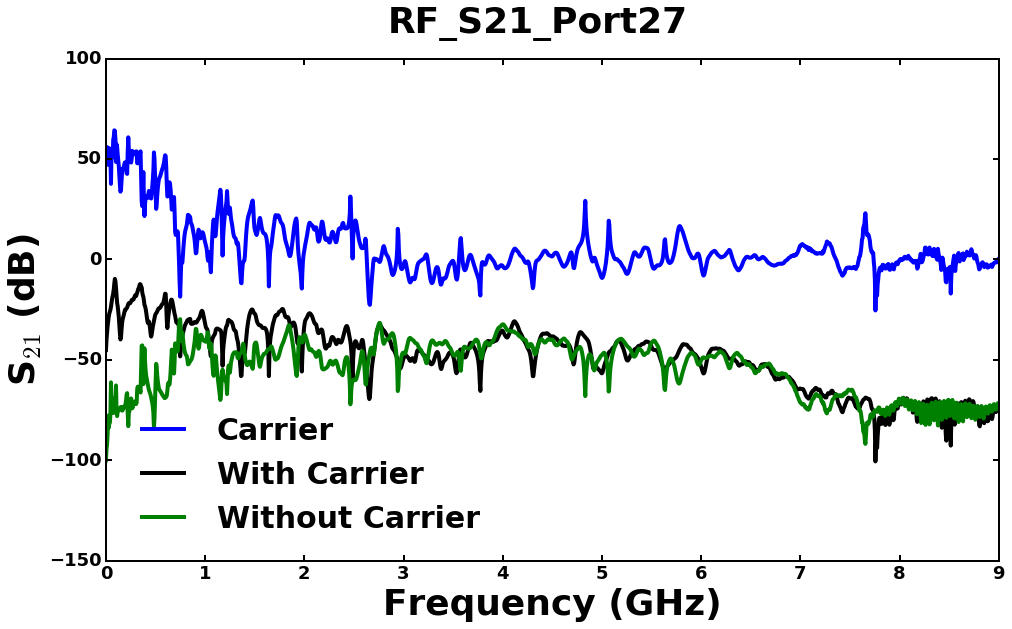

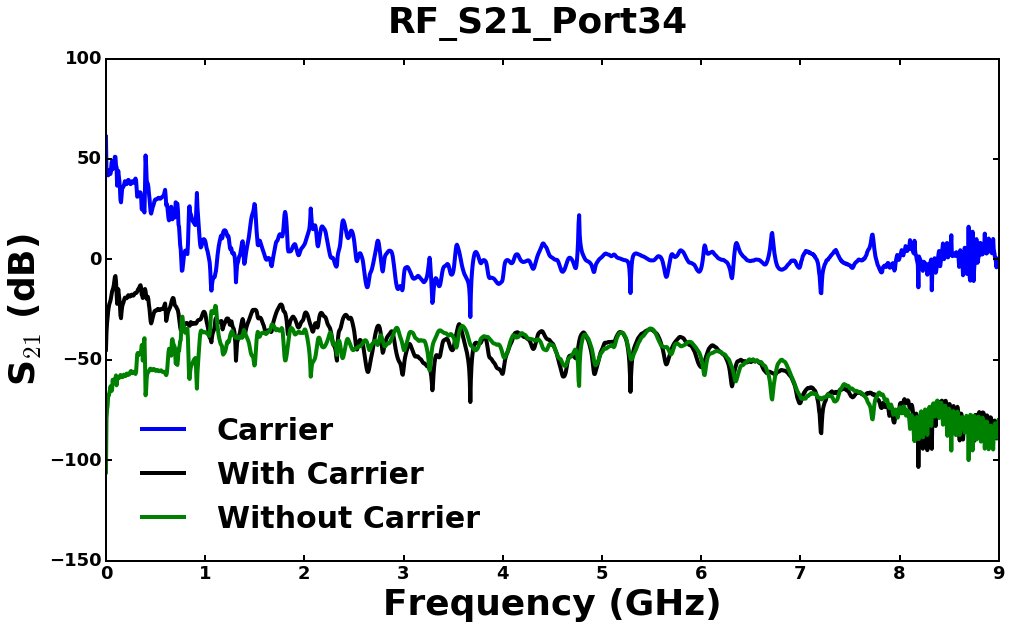

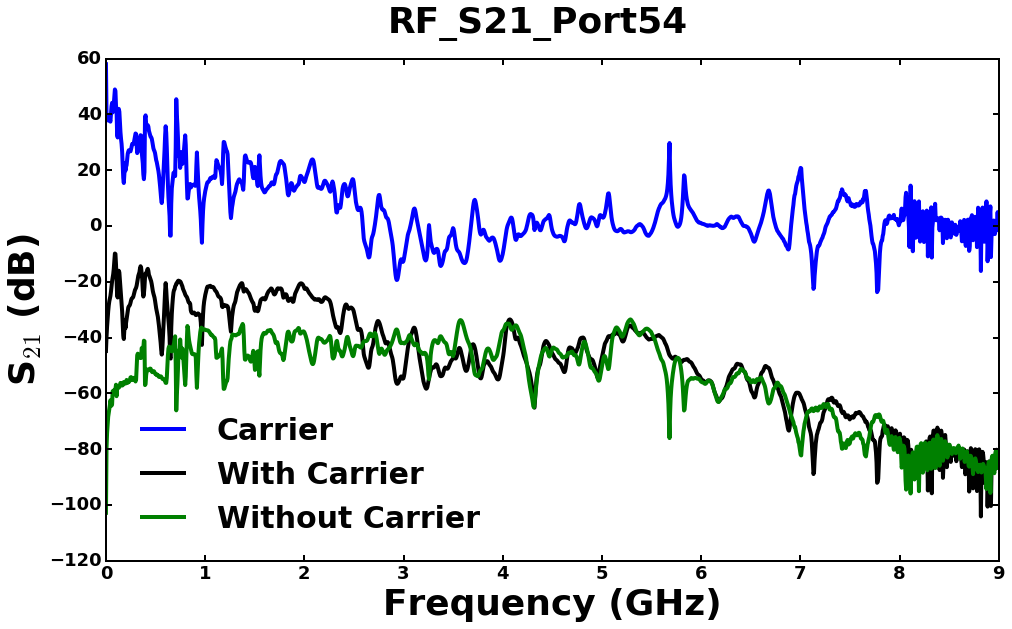

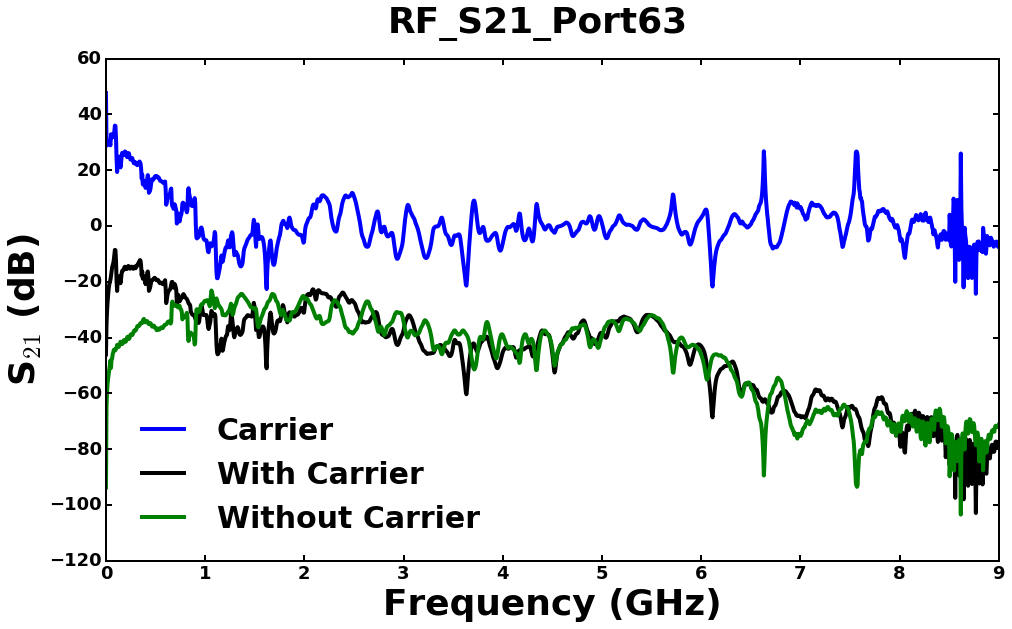

In [17]:
## RF data plotting just carrier
''' Opens all RF samples and subtracts cable results. Also plots filtered data'''

plot_file=np.concatenate((np.arange(0,4),(np.arange(10,16))))
bg_list=np.array([5, 7, 9, 8, 4, 5, 6, 7, 9, 8])
#data_array_order=[2,4,6,8,10,12,14] #Used for plotting A experiments
#data_array_order=[3,5,7,9,11,13,15] #Used for plotting B experiments
a=0
for n in plot_file:
  
    x_orig=data_array[:,0,n]
    y_orig=data_array[:,1,n]
    y_carrier=(y_orig-data_array[:,1,bg_list[a]])
    y_bg=data_array[:,1,bg_list[a]]

    
    Data_Name = os.path.basename(file_list[n]).split('.')[0] #Change name whether R=1,2 and With to Without if A or B

    plt.rc('font', weight='bold')
    plt.rcParams['axes.linewidth']=2
    plt.rcParams['figure.figsize'] = (16,9)

    fig = plt.figure()
    fig.suptitle(Data_Name, fontsize=36, fontweight='bold')

    ax = fig.add_subplot(111)

    ax.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
    ax.set_ylabel(r'S$_{21}$ (dB)', fontsize=36, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
    ax.xaxis.get_offset_text().set_visible(False)

    #fig=plt.plot(X,Y,'k-',label='Chip')
    font_size=4
    #fig=plt.plot(x_orig,y_carrier,'k-',linewidth=font_size, label='Carrier')
    fig=plt.plot(x_orig,y_carrier,'b-',linewidth=font_size, label='Carrier')
    fig=plt.plot(x_orig,y_orig,'k-',linewidth=font_size, label='With Carrier')
    fig=plt.plot(x_orig,y_bg,'g-',linewidth=font_size, label='Without Carrier')

    #fig=plt.plot(x_orig,y_orig,'r-',linewidth=font_size, label='Holder+Chip+Cables')
    
    #fig=plt.plot(x_orig,y_bg,'k-',linewidth=3)
    #fig=plt.plot(x_cable[:-1],y_cable_filt,'g-',linewidth=5)
    #fig=plt.plot(x_orig[:-1],y_orig_filt,'r-',linewidth=5)
    
    

    leg=plt.legend(fontsize=30, loc=3, frameon=False)

    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    plt.show()
    a+=1
    #save_loc=root2.directory+ '/' + 'Python_Results'+ '/' +Data_Name+'.png'
    #plt.savefig(save_loc)

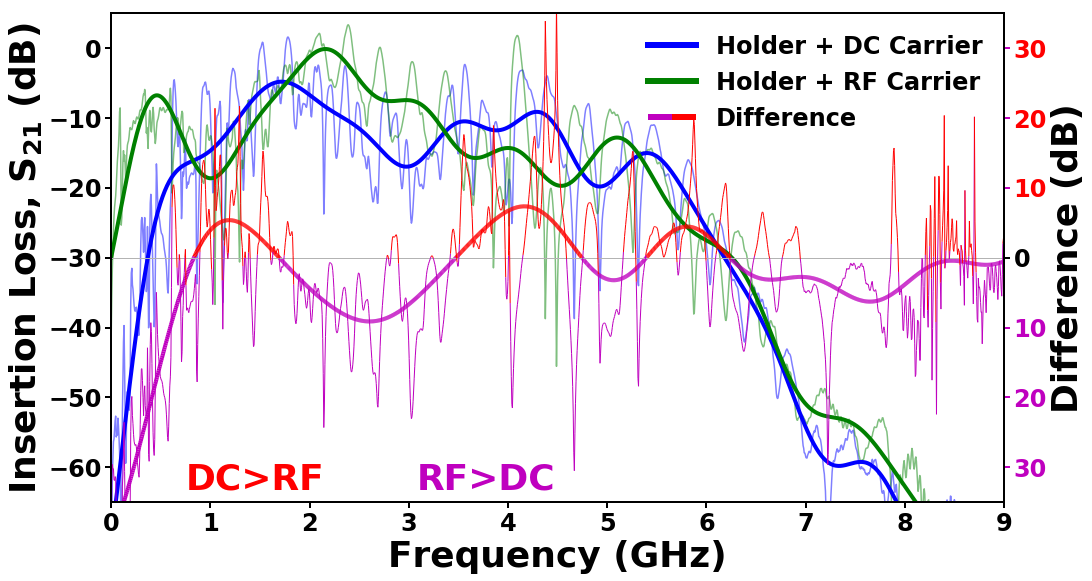

In [204]:
## Plot fancy

''' This section imports the necessary packages for the multiple color lines'''
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.legend_handler import HandlerLineCollection

''' This class is necessary to get a multi color legend'''
class HandlerColorLineCollection(HandlerLineCollection):
    def create_artists(self, legend, artist ,xdescent, ydescent,
                        width, height, fontsize,trans):
        x = np.linspace(0,width,self.get_numpoints(legend)+1)
        y = np.zeros(self.get_numpoints(legend)+1)+height/2.-ydescent
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = LineCollection(segments, cmap=artist.cmap,
                     transform=trans)
        lc.set_array(x)
        lc.set_linewidth(artist.get_linewidth())
        return [lc]
''' Setting up the Figure with 3 different layers to work on axs on left all others on right'''
fig, axs = plt.subplots()

axs1=axs.twinx()
axs2=axs.twinx()
axs3=axs.twinx()
    
''' Setting up and generating the multicolor line'''
points = np.array([mean_x, perdiff]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

points1 = np.array([mean_x, filt_perdiff[addedge_dc:-addedge_dc]]).T.reshape(-1, 1, 2)
segments1 = np.concatenate([points1[:-1], points1[1:]], axis=1)

'''Decides the colors and the cutoff for switching for both the raw and the filtered data'''
cmap = ListedColormap(['m', 'r'])
norm = BoundaryNorm([-30, 0, 30], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(perdiff)
lc.set_linewidth(1)
line = axs2.add_collection(lc) # I think this adds the collection of segments to the axs2 layer

lc1 = LineCollection(segments1, cmap=cmap, norm=norm)
lc1.set_array(filt_perdiff[addedge_dc:-addedge_dc])
lc1.set_linewidth(4)
line1 = axs1.add_collection(lc1)

'''Adding the labels'''
axs.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
axs.set_ylabel(r'Insertion Loss, S$_{21}$ (dB)', fontsize=36, fontweight='bold')
axs1.set_ylabel('Difference (dB)', fontsize=36, fontweight='bold')

'''Setting the ticks' location and lables'''
loc1y=np.arange(-30,31,10)
axs1.yaxis.set_ticks(loc1y)
label1y=['','','','',10,20,30]
axs1.yaxis.set_ticklabels(label1y)

loc2y=np.arange(-30,31,10)
axs2.yaxis.set_ticks(loc2y)
label2y=[30,20,10,'','','','']
axs2.yaxis.set_ticklabels(label2y)

loc3y=[.5]
axs3.yaxis.set_ticks(loc3y)
label3y=['0']
axs3.yaxis.set_ticklabels(label3y)

'''Change the colors of the tick labels'''
# ax.xaxis.get_offset_text().set_visible(False)
tkw = dict(size=4, width=1.5)
axs1.tick_params(axis='y', colors='r', **tkw)

tkw = dict(size=4, width=1.5)
axs2.tick_params(axis='y', colors='m', **tkw)

tkw = dict(size=4, width=1.5)
axs3.tick_params(axis='y', colors='k', **tkw)

'''Tick parameters'''
axs.tick_params(axis='both', which='major', labelsize=24, width=2, length=6)
# axs.tick_params(axis='both', which='minor', labelsize=24, width=2, length=6)
axs1.tick_params(axis='both', which='major', labelsize=24, width=2, length=6)
axs2.tick_params(axis='both', which='major', labelsize=24, width=2, length=6)
axs3.tick_params(axis='both', which='major', labelsize=24, width=2, length=6)

'''Setting figure bounds'''
axs.set(xlim=(0,9));
axs.set(ylim=(-65,5));

axs1.set(xlim=(0,9));
axs1.set(ylim=(-35,35));

axs2.set(xlim=(0,9));
axs2.set(ylim=(-35,35));

'''Writing on the Figure'''
fig.text(0.25, 0.16, 'DC>RF', ha='center', va='center',color='r', fontsize=36, fontweight='bold')
fig.text(0.45, 0.16, 'RF>DC', ha='center', va='center',color='m', fontsize=36, fontweight='bold')

'''Plot data on left axis'''
# axs.plot(mean_x,mean_dcy_filt[addedge_dc:-addedge_dc],'b-',linewidth=font_size1, label='Holder + DC Carrier')

alph=.5 #makes raw data more transparent thus lighter
lns1=axs.plot(mean_x,mean_dcy,'b-',linewidth=font_size,alpha=alph)
lns2=axs.plot(mean_x,mean_rfy,'g-',linewidth=font_size,alpha=alph)

lns4,=axs.plot(mean_x,mean_dcy_filt[addedge_dc:-addedge_dc],'b-',linewidth=font_size1, label='Holder + DC Carrier')
lns5,=axs.plot(mean_x,mean_rfy_filt[addedge_rf:-addedge_rf],'g-',linewidth=font_size1, label='Holder + RF Carrier')

'''Make horizontal line'''
font_size=1.5
font_size1=4
spot=6.75
vertlinex=[spot,spot]
vertliney=[-100,5]

horlinex=np.arange(0,1601,1)
horliney=np.zeros(1601)

axs1.plot(horlinex,horliney, '.7', linewidth=1)


# lns3=axs.plot(mean_x,perdiff,'r-',linewidth=font_size,alpha=alph)
# lns6=ax.plot(mean_x,perdiff_filt,'k-',linewidth=font_size, label='DC-RF')
# lns7=axs.plot(mean_x,filt_perdiff[addedge_dc:-addedge_dc],'r-',linewidth=0, label='Difference')

# leg=axs.legend(fontsize=30, loc='best', frameon=False)
# for legobj in leg.legendHandles:
#     legobj.set_linewidth(4.0)



# lns5=ax.plot(mean_x,log10div(mean_rfy_filt,2),'p-',linewidth=font_size1, label='RF')
# plt.plot(mean_x,diff,'k-',linewidth=font_size, label='DC-RF')

# lns = lns4+lns5+lc
# labs = [l.get_label() for l in lns]

'''Make legend for the 3 lines. Need to use Handler_map because of the multicolor line'''
leg=axs.legend([lns4,lns5,lc1],['Holder + DC Carrier','Holder + RF Carrier',"Difference"],\
      handler_map= {lns4: HandlerLine2D(),lns5: HandlerLine2D(),lc1: HandlerColorLineCollection(numpoints=2)}, \
               loc='upper right',fontsize=24, frameon=False, handlelength=2)

for legobj in leg.legendHandles:
    legobj.set_linewidth(6.0) # Thickness of the legend lines


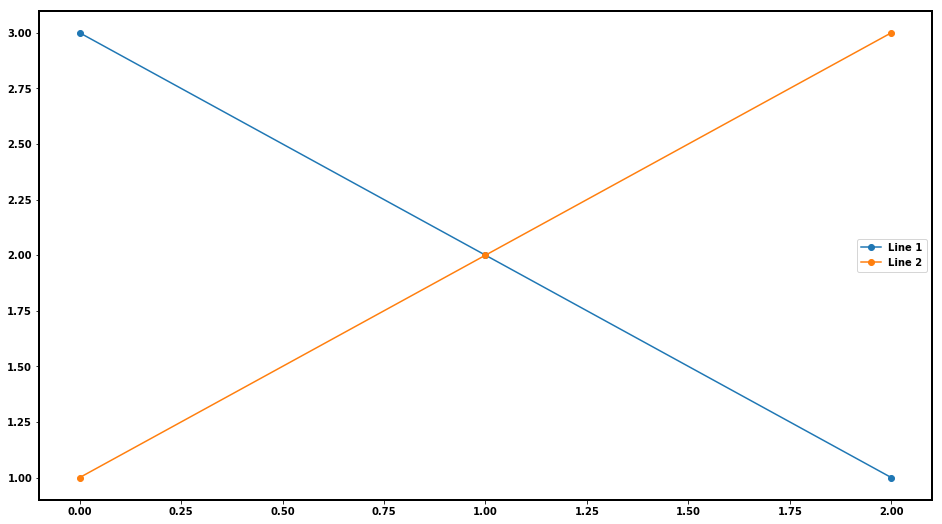

In [148]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot([3, 2, 1], marker='o', label='Line 1')
line2, = plt.plot([1, 2, 3], marker='o', label='Line 2')

plt.legend(handler_map={line1: HandlerLine2D(), line2: HandlerLine2D()})

In [134]:
labs

['Holder + DC Carrier', 'Holder + RF Carrier', 'Difference (DC-RF)']

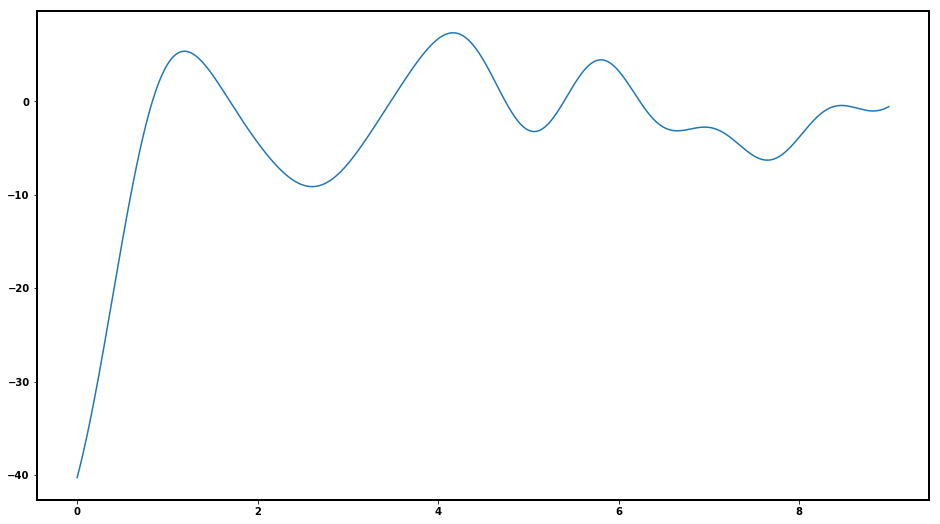

In [83]:
points2 = np.array([mean_x, filt_perdiff[addedge_dc:-addedge_dc]]).T.reshape(-1, 1, 2)
segments2 = np.concatenate([points1[:-1], points[1:]], axis=1)

fig, axs = plt.subplots()

ax.plot(mean_x, filt_perdiff[addedge_dc:-addedge_dc])